In [1]:
using Plots
import Plots

In [2]:
# c(q) = 2exp(-0.5q)
c(q) = 0.5 + q*(1-q*exp(-q))
p(q) = -2(log(q)-log(2))
π(q) = q*p(q) - c(q)

π (generic function with 1 method)

In [4]:
qvec = range(0.001, 3; length=100)
πvec = π.(qvec)

100-element Vector{Float64}:
 -0.48579719608041594
 -0.27014249989139055
 -0.12932408813706747
 -0.01812535884292643
  0.07409361001409898
  0.15237242855216182
  0.21964732136441056
  0.27782945415020666
  0.32825325200049793
  0.3718971017574879
  ⋮
 -4.546920796312181
 -4.661649338493254
 -4.777114103289779
 -4.893303023910292
 -5.010204314958552
 -5.127806467225771
 -5.246098242504647
 -5.365068668428419
 -5.484707033338211

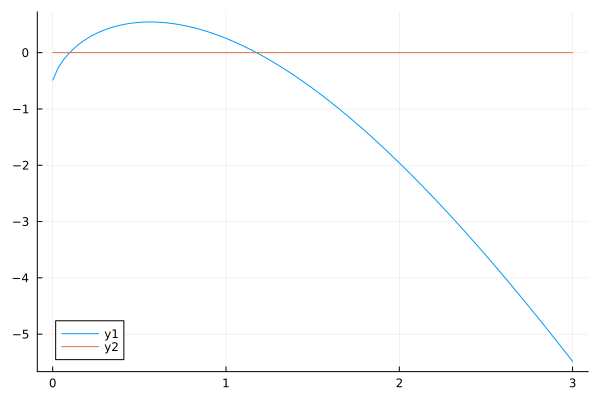

In [6]:
plot(qvec,πvec)
plot!(qvec, qvec*0)

In [30]:
function grid_search(A=0.001, B=4, N=100)
    
    grid = range(A, B; length=N)

    πvec = [π(A)]
    πstar = π(A)
    qstar = A

    global πvec, πstar, qstar
    
    for q in grid
        push!(πvec, π(q))
        if πvec[end] >= maximum(πvec)
            πstar = πvec[end]
            qstar = q
        end
    end

    return πstar
end

grid_search (generic function with 4 methods)

In [31]:
grid_search()

0.5448207303738057

In [32]:
# Constrained optimization
using Optim

In [34]:
f(x,y) = 1-(x-0.5)^2 - (y-0.3)^2
# f(u) = f(u[1], u[2])
f(u::AbstractVector) = f(u...)

f (generic function with 2 methods)

In [39]:
res = Optim.optimize(
    u->-f(u),
    [0.1,0.3]
)

 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    28
    f(x) calls:    58


In [41]:
res.minimum

-0.999999998379919

In [42]:
using Plots

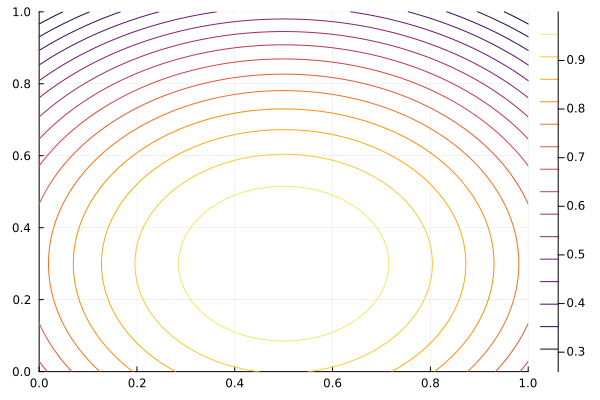

In [43]:
contour(
    range(0,1; length=100),
    range(0,1; length=100),
    f
)

In [44]:
lower = [-Inf, -Inf]
upper = [0.3, Inf]
initial_x = [0.1,0.3]
results = optimize(f, lower, upper, initial_x)

 * Status: success

 * Candidate solution
    Final objective value:     8.400000e-01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 2.83e+34 ≰ 1.0e-08

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    1
    f(x) calls:    51
    ∇f(x) calls:   51
